# Harmonic oscillator with computer algebra

## Harmonic oscillator
This material includes the derivation of harmonic oscillator solutions using Sage in the following classic cases:

- free oscillator
- free damped oscillator
- forced oscillator with damping: resonance phenomenon
 

### What is a harmonic oscillator?


The harmonic oscillator is a point particle with mass $m$ in the force field, which depends linearly on the position. The restoring force to the equilibrium position depends linearly on the amount of the deflection. An example of such a force may be the reaction of a flexible body applying Hook's law. In other words, we have a material point with mass $m$ in a square potential.

Consider this last definition, let's have potential:
$$ U(x) = \frac{1}{2}k x^2$$
then the Newton equation for a material point will be:
$$ m a = -\frac{\partial U(x)}{\partial x} = - kx,$$
and because acceleration $a$ is the second derivative of the position after the time we have finally:
$$ m \ddot x   =  -kx.$$
This is the equation of motion for the harmonic oscillator. Another method of obtaining it is to substitute the force derived from the linear span - that is the Hook's law $\vec F = -k \vec x$, to equate $m\vec a = \vec F$.

### Approximation of small vibrations

The harmonic oscillator is an extremely important model that appears in many real situations. Note that if we have any potential, which in the $x=0$ point has a minimum, then we can write its development of Taylor:
$$ U(x) = U(0) + U'(0)x + \frac{1}{2}U''(0) x^2+ ...$$
Since we have assumed that in $x=0$ we have a minimum, the first derivative disappears $U'(0) = 0$ and we get:
$$ U(x) = U(0) + \frac{1}{2}U''(0) x^2+ ...$$
Taylor's series can be broken while keeping the word with the lowest non-flammable power of $x$ or the other. Permanent word can be omitted (as mathematicians say, without limiting the generality of friendships, that it is equal to zero). We will then receive an approximation that is right for small $x$:
$$ U(x) = \frac{1}{2}U''(0) x^2.$$
The obtained potential is identical to the square potential, if only the second derivative of the potential at the point of its minimum U '' (0) is identified with the elastic constant $k$. So we see that the movement in every minimum "almost" of any potential, for small deviations, can be approximated by a harmonic oscillator. This fact is the reason why the harmonic oscillator is such a frequently used model in physics.



## Free oscillator
Consider the equation of motion for a harmonic oscillator that does not contain friction or any external force. It has a form:
$$  m \ddot x   =  -kx.$$
It is conveniet to use dimensionless variables, in which we have:
$$  \ddot x   =  -\omega_0^2x,$$
where $\omega_0 = \sqrt{\frac{k}{m}}$ is a positive number.

It is a linear second order  ordinary differential equation with constant coefficients. Equations from this class can be easily solved - assuming the form of a solution and substituting it for the equation. With the computer algebra system included in SageMath, we can simplify this procedure using the desolve function:

In [1]:
load('cas_utils.sage')

In [2]:
var('omega0 x0')
assume(omega0>0)

var('t')
X = function('X')(t)

osc = diff(X,t,2) == -omega0^2*X 
showmath( osc )

<IPython.core.display.Math object>

Because we use a set of variables for operations on expressions containing derivatives, the above cell will give us a mathematical formula of the differential equation representing the harmonic oscillator.

With this expression, we can use computer algebra to solve the differential equation:

In [3]:
phi_anal = desolve(osc,dvar=X,ivar=t,show_method=True)
showmath(phi_anal)

<IPython.core.display.Math object>

First, we see that we must assume that $\omega_0$ is non-zero. Otherwise, the solution would have a different form.

Secondly, we see that we have been scrubbing the so-called a general solution that depends on two constants. We can determine these two constants knowing the position and speed of the oscillator at some point in time. Because equations of motion do not depend on time, without the limitation of generality, $t=0$ can be used as an initial moment. 


Sage, can also do determine constants, so if in the moment $t=0$, the oscillator was in the rest state: $x(0)=x_0$ and $v(0)=0$, then we have:

In [4]:
phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,x0,0])
showmath(phi_anal)

<IPython.core.display.Math object>

and if, at $t=0$, the oscillator was at $x(0)=0$ and $v(0)=v_0$, then we have:

In [5]:
var('v0 x0')
phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,0,v0])
showmath(phi_anal)

<IPython.core.display.Math object>

at the moment of $t=0$, the oscillator was at $x(0)=x_0$ and $v(0)=v_0$, then we have:

In [6]:
var('v0 x0')
phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,x0,v0])
showmath(phi_anal)

<IPython.core.display.Math object>

We can also set specific numerical values:

In [7]:
phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,2,3])
showmath(phi_anal)

<IPython.core.display.Math object>

Let's plot of this solution with initial condition $x_0=2$  $v_0=3$ for  $\omega_0=1$. We see that the solution is tangent to $3/\omega_0$ line that passes point $(0,2)$:

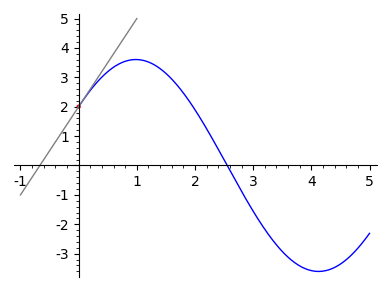

In [8]:
plot(phi_anal.subs(omega0==1),(t,0,5),figsize=4)+\
 plot( 3*t+2,(t,-1,1),color='gray')+\
 point([0,2],color='red')

We can examine how the solution depends on the parameters $\omega_0$ and $x_0$ (with $v_0=0$).

In [9]:
#@interact
def free_oscilator_xt(w0=slider(0.1,3,0.1,default=1),x0=slider(0.1,3,0.1,default=1)):
    phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,1,0])
    p = plot(phi_anal.subs({omega0:1}),(t,0,7),color='gray')
    phi_anal = desolve(osc,dvar=X,ivar=t,ics=[0,x0,0])
    p += plot(phi_anal.subs({omega0:w0}),(t,0,7))
    p.show( ticks=[[0,pi/2,pi,3/2*pi,2*pi],1/2],tick_formatter="latex",figsize=(6,2))

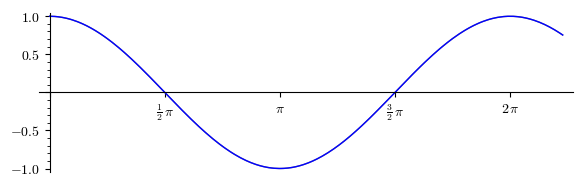

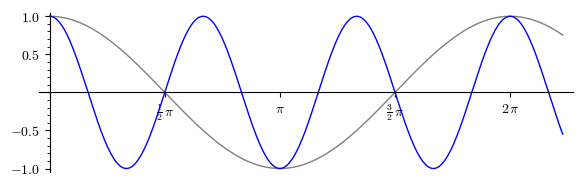

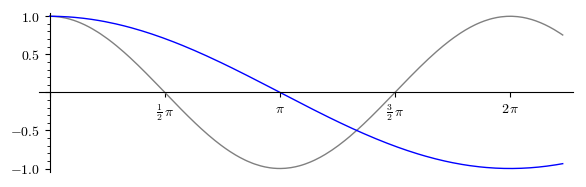

In [10]:
free_oscilator_xt(w0=1, x0=1)
free_oscilator_xt(w0=3, x0=1)
free_oscilator_xt(w0=1/2, x0=1)

## Damped oscillator
As we have seen from previous considerations, the free hamon oscillator performs vibrations infinitively long. In practice, every classic harmonic oscillator is subjected to certain damping forces, which cause the vibration to decay in time. It is so called damped oscillator. A special case of the friction force, which is taken into account when testing the motion of the oscillator - is the friction directly proportional to the speed:
$$ \vec F_D = - \gamma \vec v.$$
Such friction occurs, for example, when the ball is in the liquid with small Reynolds numbers and is called viscous friction. If the Reynolds number is large, then the friction depends more on the speed - in aerodynamics a quadratic relationship is a good model.

Consideration of linearly rate-dependent friction has the basic advantage that, despite adding an additional member to the equation of motion, we still  deal with a linear equation with constant coefficients and a full mathematical analysis of solutions can be carried out. So we have the equation:


$$m \ddot x   + \Gamma \dot x  + kx  =  0.$$

Let's divide this equation by $m$ and enter the new $\gamma=\Gamma/m$ designation, and for $k/m$, put $\omega_0^2$ as in the previous case:

$$\ddot x   + \gamma \dot x  + \omega_0^2 x  =  0.$$

From the theory of linear differential equations, we know that we should consider the roots of a characteristic polynomial  for a given equation and depending on their nature we have a different solution. It can be easily done assuming that solution to the equation in an exponent $e^{k t}$ and substitute this form into ODE:

In [11]:
var('k t')
var('omega omega0')
var('g', latex_name='\gamma')

f = exp(k*t)
eq = f.diff(t,2)+g*f.diff(t)+omega0^2*f
showmath(eq)

<IPython.core.display.Math object>

Now we can factorize this expression:

In [12]:
eq.factor().show()

(g*k + k^2 + omega0^2)*e^(k*t)

It is zero for all $t$ only when ${\gamma} k + k^{2} + \omega_{0}^{2}=0$. This is quadratic equation which has follwing solutions:

In [13]:
showmath( (eq.factor()*exp(-k*t)).solve(k) )

<IPython.core.display.Math object>

There are three different values of determinant:

$$\Delta = \sqrt{\gamma^2-4 \omega_0^2}$$

for which soltuion have qualitatively different properties:

 - Two complex roots - damped oscillations.
 - Two real roots - damped oscillation, no oscillation.
 - One degenerate root  ($\Delta=0$ discriminant) - critical vibrations, no oscillations, but it can have one maximum.

### Two complex roots:
Since both $\gamma$ and $\omega_0$ are positive and the expression for $\Delta$  factorizes:

$$ \gamma^2-4 \omega_0^2 = ( \gamma-2 \omega_0)( \gamma+2 \omega_0),$$ 

the expression under square root will be negative if and only if 

\begin{equation}
\label{eq:osc_1}
\gamma-2 \omega_0 < 0
\end{equation}


In [14]:
var('omega omega0')
var('g', latex_name='\gamma')

forget()
assume(g-2*omega0<0)
assume(g>0)
assume(omega0>0)
show( assumptions() ) 

osc = diff(X,t,2) == -g*diff(X,t)-omega0^2*X 

showmath(osc)

[g - 2*omega0 < 0, g > 0, omega0 > 0]

<IPython.core.display.Math object>

In [16]:
phi_anal = desolve(osc,dvar=X,ivar=t)
showmath(phi_anal)

<IPython.core.display.Math object>

In Sage above expression contain constants which have no "handles" in global namespace:

In [17]:
phi_anal.variables()

(_K1, _K2, g, omega0, t)

It means that expession like `.subs({_K1:2})` will throw an exception.

We can however define symbolic variables for all constants in solution. Note that those constants start with  underscore character, thus we can do it automatically:

In [18]:
[var(str(s)) for s in phi_anal.variables() if str(s).startswith("_")]

[_K1, _K2]

Now we have `_K1` variable available, and we can use it in substitutions:

In [19]:
_K1

_K1

Since the solution is in the form of a periodic function multiplied by exponent, we might want to draw the envelope:

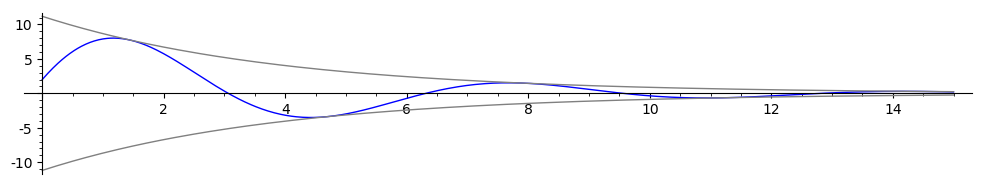

In [20]:
var('t')
pars={_K1:11,_K2:2,omega0:1,g:.51}
A = sqrt(_K1^2+_K2^2).subs(pars)
plot( phi_anal.subs(pars), (t,0,15), figsize=(10,2)) + \
    plot( (A*exp(-1/2*g*t)).subs(pars), (t,0,15),color='gray' ) +\
    plot( (-A*exp(-1/2*g*t)).subs(pars), (t,0,15),color='gray' )

**Where did the formula for A come from?**

We have formula which allow to add $\sin$ and $\cos$ functions with the same frequency: 
$$\sqrt{2} \sin\left(\frac{1}{4} \, \pi + {x}\right)=\cos\left({x}\right) + \sin\left({x}\right)$$


$$\sqrt{a^{2} + b^{2}} \sin\left({x} + \arctan\left(\frac{b}{a}\right)\right)$$

We have:


In [21]:
phi_osc = phi_anal.coefficient(e^(-1/2*g*t))
showmath(phi_osc)

<IPython.core.display.Math object>

We can transform the linear combination of the $\sin$ and $\cos$ functions into one function with a different amplitude. In order to accomplish this in Sage, we can use  wildcard substitutions.

In [22]:
w0 = SR.wild(0)
w1 = SR.wild(1)
w2 = SR.wild(2)
sub3 =  { w1*sin(w0)+w2*cos(w0):sqrt(w1^2+w2^2)*sin(w0+arctan(w2/w1)) }

In [23]:
showmath(phi_osc.subs(sub3))

<IPython.core.display.Math object>

Alternatively, you can match the solution to a bit more complicated pattern:

In [24]:
w0 = SR.wild(0)
w1 = SR.wild(1)
w2 = SR.wild(2)
w3 = SR.wild(3)
sub4 =  { w3*(w1*sin(w0)+w2*cos(w0)):w3*sqrt(w1^2+w2^2)*sin(w0+arctan(w2/w1)) }

In [25]:
showmath(phi_anal.subs(sub4))

<IPython.core.display.Math object>

On the other hand if have expression in the form of  $\sin(x+\phi) e^{-x}$, then the exponent term is an envelope: 

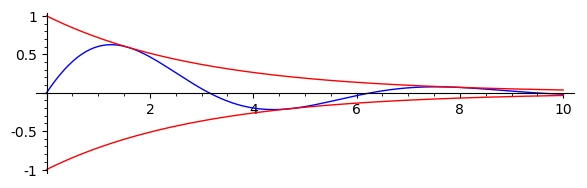

In [26]:
plot(sin(x)*exp(-x/3) ,(x,0,10),figsize=(6,2))+\
 plot([exp(-x/3),-exp(-x/3)],(x,0,10),color='red')

we have therefore: 

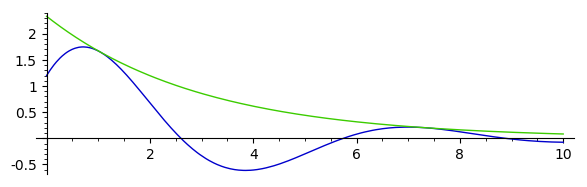

In [27]:
a,b = 2,1.2
plot([(a*sin(x)+b*cos(x))*exp(-x/3),sqrt(a^2+b^2)*exp(-x/3)],\
     (x,0,10), figsize=(6,2))

### Two real roots

If the determinant $\Delta$ is positive (but non-zero), i.e.:

\begin{equation}
\label{eq:osc_2}
\gamma-2 \omega_0 > 0,
\end{equation}

then we have: 

In [28]:
var('omega omega0')
var('g', latex_name='\gamma')
forget()
assume(g-2*omega0>0)
assume(g>0)
assume(omega0>0)
show( assumptions() ) 
osc = diff(X,t,2) == -g*diff(X,t)-omega0^2*X 
showmath(osc)

[g - 2*omega0 > 0, g > 0, omega0 > 0]

<IPython.core.display.Math object>

In [29]:
phi_anal = desolve(osc,dvar=X,ivar=t)
showmath(phi_anal)

<IPython.core.display.Math object>

We see that the solution does not contain periodic functions but only is the sum of two exponents, with negative exponents.

Task: Prove that the exponent 
$k_{1} e^{\left(-\frac{1}{2} \, {\left(\gamma - \sqrt{\gamma^{2} - 4 \, \omega_{0}^{2}}\right)} t\right)}$,
for $t>0$, it's negative.

In this case, solutions are decaying without oscillations, however, for certain parameters it is possible that a single extremum will occur:


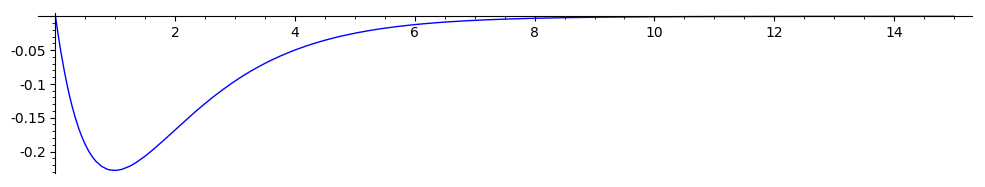

In [30]:
var('t')
plot( phi_anal.subs({_K1:-1,_K2:1,omega0:1,g:2.1}), (t,0,15), figsize=(10,2))

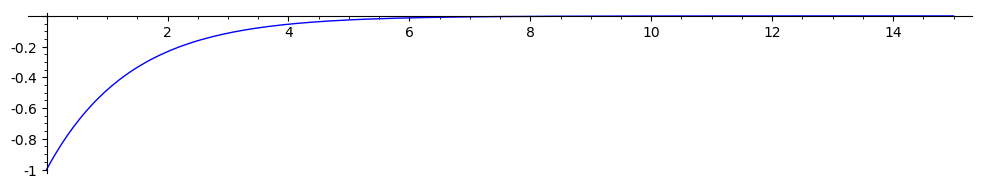

In [31]:
var('t')
plot( phi_anal.subs({_K1:-1,_K2:0,omega0:1,g:2.1}), (t,0,15), figsize=(10,2))

### Degenerate case

Consider the case when the characteristic equation disappears. It is fullfilled when:

\begin{equation}
\label{eq:osc_3}
\gamma-2 \omega_0 < 0
\end{equation}

Let us have a look how the general solution looks:

In [32]:
var('omega omega0')
var('g', latex_name='\gamma')

forget()
assume(g-2*omega0==0)
assume(g>0)
assume(omega0>0)
show( assumptions() ) 
osc = diff(X,t,2) == -g*diff(X,t)-omega0^2*X 
showmath(osc)
phi_anal = desolve(osc, dvar=X, ivar=t)
showmath(phi_anal)

[g - 2*omega0 == 0, g > 0, omega0 > 0]

<IPython.core.display.Math object>

This case is called critically damped. 

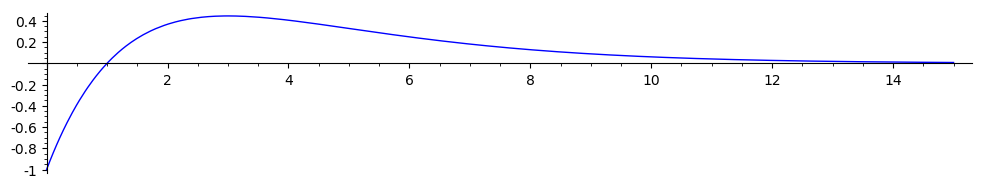

In [33]:
var('t')
plot( phi_anal.subs({_K1:-1,_K2:1,g:1}), (t,0,15), figsize=(10,2))

### Power  dissipation

Having analytical solution one can easily describe how energy is dissipated in the system. For given $omega_0$ we might expect that power remains constant in two cases: $\gamma=0$ and $\gamma\to\infty$. Let's check it out - first we can obtain analytical solutions in oscilating and damped regimes. We will take initial condition $x_0=1$ and $v_0=1$:

In [34]:
forget()
assume(g>2*omega0)
assume(g>0)
assume(omega0>0)
x_damped = desolve(osc, dvar=X, ivar=t, ics=[0,1,0] )

forget()
assume(g<2*omega0)
assume(g>0)
assume(omega0>0)
x_oscil = desolve(osc, dvar=X, ivar=t, ics=[0,1,0] )

Now, let's define functions which define dissipated power:

\begin{equation}
\label{eq:power_harm}
P = F_{friction} v = (\gamma v) v =  \gamma v^2
\end{equation}

and total energy (for $m=1$):


\begin{equation}
\label{eq:E_harm}
E_{tot} = \frac{1}{2}v^2 + \frac{1}{2} \omega_0 x^2 
\end{equation}



In [35]:
E = lambda x: 1/2 * x.diff(t)^2 + 1/2*omega0*x^2
P = lambda x: g * (x.diff(t))^2

Now we can plot power energy and trajectory as a function of time:

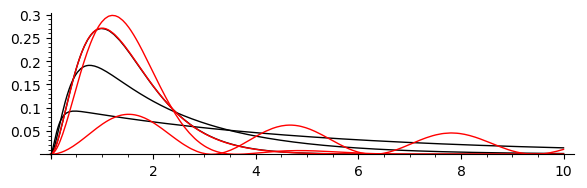

In [36]:
plt_power = plot([P(x_damped).subs({omega0:1,g:g_}) for g_ in [2.01,4,10]],\
     (t,0,10), color='black')
plt_power += plot([P(x_oscil).subs({omega0:1,g:g_}) for g_ in [.1,1,1.99]],\
      (t,0,10), color='red')
plt_power.show(figsize=(6,2))

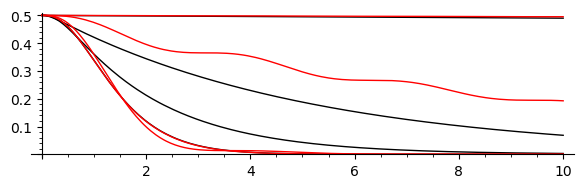

In [37]:
plt_E = plot([E(x_damped).subs({omega0:1,g:g_}) for g_ in [2.01,4,10,1e3]],\
             (t,0,10),color='black')
plt_E += plot([E(x_oscil).subs({omega0:1,g:g_}) for g_ in [1e-3,.1,1,1.99]],\
              (t,0,10),color='red')
plt_E.show(figsize=(6,2))

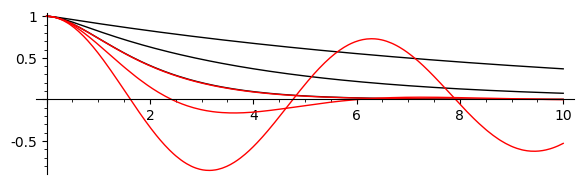

In [38]:
plt_x = plot([(x_damped).subs({omega0:1,g:g_}) for g_ in [2.01,4,10]],\
             (t,0,10),color='black')
plt_x += plot([(x_oscil).subs({omega0:1,g:g_}) for g_ in [.1,1,1.99]],\
              (t,0,10),color='red')
plt_x.show(figsize=(6,2))

Note that for damping near the critical (i.e. $\Delta=0$) regime, the power dissipation is maxiamal.

## Forced harmonic oscillator
If on a harmonic oscillator with damping a certain force depends on time of $\sin(\omega t)$ type, then we are dealing with a forced harmonic oscillator. In this case, the equation of motion  contains a term independent of the position $x(t)$, but explicitely dependent  on time. Such an equation is a linear non-homogeneous differential equation and we can give its analytical  solutions.
Let's see how they look:

In [39]:
var('a omega omega0')
var('g', latex_name='\gamma')
forget()
assume(g-2*omega0<0)

Phi = function('Phi')(t)
assume(g>0)
assume(omega0>0)
osc = diff(Phi,t,2)+ g*diff(Phi,t) + omega0^2*Phi -a*sin(omega*t)

showmath(osc)

<IPython.core.display.Math object>

In [40]:
phi_anal,method = desolve(osc,dvar=Phi,ivar=t,show_method=True)
print(method)
showmath(phi_anal)

variationofparameters


<IPython.core.display.Math object>

It can be seen that we have a solution in the form of a general solution of a free damped oscillator, hence a homogeneous equation (contains $k_1$ and $k_2$ constants) and a solution that does not contain free constants. It is  called a special solution to the heterogeneous equation. It can be noted that this solution is the one that survives in the $t\to\infty$ limit.

In [41]:
r_sz = phi_anal.operands()[1]
showmath(r_sz)

<IPython.core.display.Math object>

Let's transform a special solution to the  form: $$A\sin(\omega t+\phi).$$ 
To do this, we extract  the numerator and denominator:

In [42]:
expr_denom = r_sz.denominator()
expr = r_sz.numerator()
showmath([expr,expr_denom])

<IPython.core.display.Math object>

The numerator is a sum of $\sin$ and $\cos$ with different amplitudes. The formula: $$a \sin\left(x\right) + b \cos\left(x\right) =\sqrt{a^{2} + b^{2}} \sin\left(x + \arctan\left(\frac{b}{a}\right)\right)$$ can be used
Use for this purpose to put with wildcards (an. Wildcards):

In [43]:
w0 = SR.wild(0)
w1 = SR.wild(1)
w2 = SR.wild(2)
w3 = SR.wild(3)
sub3 =  { w1*sin(w0)+w2*cos(w0):sqrt(w1^2+w2^2)*sin(w0+arctan(w2/w1)) }

Let's check how the substitution works on the formula:

In [44]:
var('a b x')
assume(a>0)
(a*sin(x)+b*cos(x)).subs(sub3).show()

sqrt(a^2 + b^2)*sin(x + arctan(b/a))

and expand the obtained formula to check:

In [45]:
assume(a>0)
(a*sin(x)+b*cos(x)).subs(sub3).full_simplify().show()

b*cos(x) + a*sin(x)

Everything looks nice, but we have a classic problem to choose the function's branch. Let's look at the graph of the $\tan(x)$ function:

-1.67046497928606 -4.61272032789353


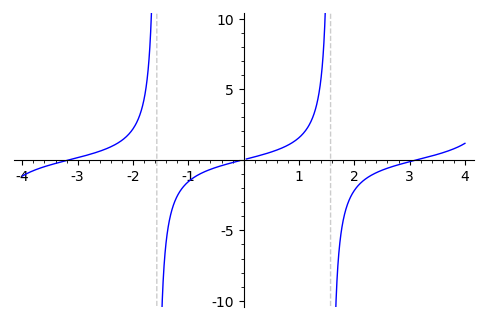

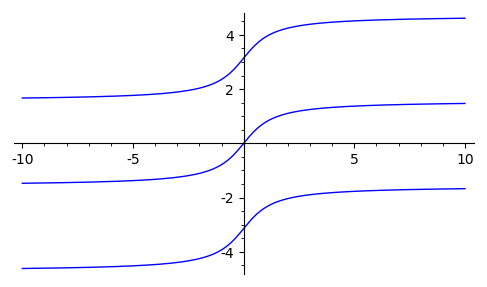

In [46]:
print (arctan(10)-pi).n(),(arctan(-10)-pi).n()

plot(tan(x),(x,-4.,4),detect_poles='show',figsize=5,ymin=-10,ymax=10).show()
sum([plot(arctan(x)+n*pi,(x,-10.,10),figsize=(5,3)) for n in range(-1,2)])

We should take the branch $y\in -\pi .. 0$ and the function in Sage takes $y\in -\pi ..\pi$. Therefore, it is better to use the two-argument `arctan2`:

In [47]:
w4 = SR.wild(4)
w5 = SR.wild(5)
sub3a = {arctan(w4/w5):(arctan2(w4,w5)-pi)}

Returning to our oscillator, we can use the substitution:

*Note* `collect (sin (omega * t))` is needed for the pattern to be in a form in which the substitution can be used.

In [48]:
expr = r_sz.numerator().collect(sin(omega*t))
showmath(expr)

<IPython.core.display.Math object>

In [49]:
expr = expr.subs(sub3)
showmath(expr)

<IPython.core.display.Math object>

In [50]:
expr = expr.subs(sub3a)
showmath(expr)

<IPython.core.display.Math object>

and in all its glory our formula is presented as:

In [51]:
r_szczegolne = (expr/expr_denom).canonicalize_radical()
showmath(r_szczegolne)

<IPython.core.display.Math object>

If for some reason we would like to pick its coefficients then we have:

In [52]:
w0 = SR.wild(0)
w1 = SR.wild(1)
m = r_szczegolne.match(w0*sin(w1))
showmath(m)

<IPython.core.display.Math object>

check:

In [53]:
showmath(w0.subs(m)*sin(w1.subs(m)))

<IPython.core.display.Math object>

Thus, the amplitude of the oscillator in the limit $t\to\infty$  is:

In [54]:
A = -w0.subs(m)
showmath(A)

<IPython.core.display.Math object>

It is a famous formula that contains the phenomenon of resonance. If the damping is weak then in the case of $\omega_0 \to \omega$, the amplitude of the special solution will increase to very large values, and will be infinite if the system is not damped. This means that the energy from the external source can be pumped in particularly efficiently if the frequency of force is consistent with the own frequency of the system.

The strength of this phenomenon was seen by soldiers passing over the bridge in Angers (http://en.wikipedia.org/wiki/Angers_Bridge), which had just its own frequency equal to the frequency of the military march. The bridge during the march of the column of the army, stared to swing to such an amplitude that it was destroyed.

In [55]:
phase = w1.subs(m)-omega*t-pi
showmath(phase)

<IPython.core.display.Math object>

The maximal amplitude depends on the attenuation coefficient:

In [56]:
#@interact
def plot_A_phase(g_=slider(0.01,1,0.01,label="$\gamma$",default=0.2)):
    pars = {g:g_,a:1,omega0:1}
    print ( g^2*omega^2 + omega^4 - 2*omega^2*omega0^2 + omega0^4 ).subs(pars)
    p = plot(A.subs(pars),(omega,0,10))
    p += plot(phase.subs(pars),(omega,0,10),color='red',detect_poles="show")
    p.show(figsize=(6,2))

omega^4 - 1.99000000000000*omega^2 + 1


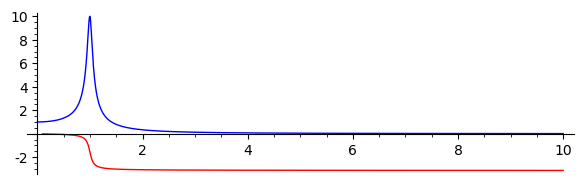

omega^4 - omega^2 + 1


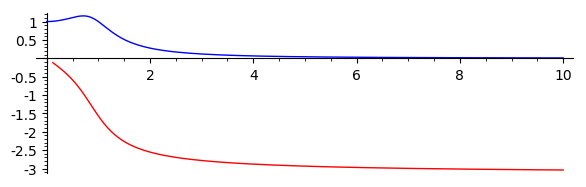

(None, None)

In [57]:
plot_A_phase(g_=0.1),plot_A_phase(g_=1)

### Numerical analysis

We can also numerically integrate the equation of motion for the harmonic oscillator. It requires to know all parameters and initial conditions numerically before, and it does not allow for easy analysis of the generic properties of the solutions. On the other hand numerical procedure can be applied easily to system of ODE which do not have analytical solution. Here, let us compare results obtained from numerical solution with $t\to\infty$ formula:

In [58]:
var('phid',latex_name=r'\dot\varphi')
var('phi',latex_name=r'\varphi')


phi

In [59]:
rhs = solve(osc,diff(Phi(t), t, 2))[0].rhs()
#@interact
def plot_A_traj(g_=slider(0.01,2.2,0.01,label="$\gamma$",default=0.2),\
                omega_=slider(0.01,5.134,0.01,label="$\omega$",default=1.4)):
    pars = {g:g_,a:1,omega0:1}
    print ( g^2*omega^2 + omega^4 - 2*omega^2*omega0^2 + omega0^4 ).subs(pars)
    p = plot(A.subs(pars),(omega,0,10),figsize=(10,2))
    p += plot(phase.subs(pars),(omega,0,10),color='red',detect_poles="show")
    pars = {omega:omega_,omega0:1,a:1,g:g_}
    

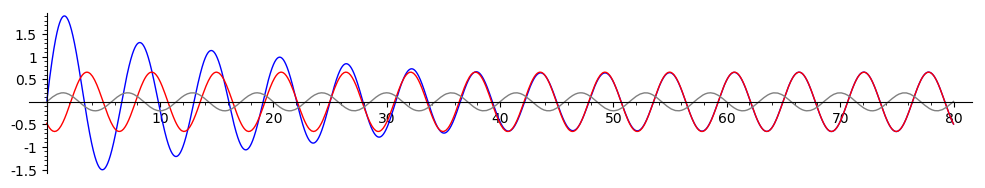

In [60]:
pars = {omega:1+0.1,omega0:1,a:0.2,g:.2}
ode = [phid,rhs.subs({Phi:phi,diff(Phi,t):phid}).subs(pars)]
times = srange(0,80,0.001)
ics = [0.0,2.1]
sol = desolve_odeint(ode,ics,times,[phi,phid])
line( zip(times,sol[::1,0]),figsize=(10,2) ) + \
 plot( r_szczegolne.subs(pars), (t,0,80),color='red') +\
 plot( (a*sin(omega*t)).subs(pars), (t,0,80),color='gray')

In [61]:
rhs = solve(osc,diff(Phi(t), t, 2))[0].rhs()
#@interact
def plot_A_traj(g_=slider(0.01,2.2,0.01,label="$\gamma$",default=0.2),\
                omega_=slider(0.01,5.134,0.01,label="$\omega$",default=1.4)):
    pars = {g:g_,a:1,omega0:1}
    print ( g^2*omega^2 + omega^4 - 2*omega^2*omega0^2 + omega0^4 ).subs(pars)
    p = plot(A.subs(pars),(omega,0,10),figsize=(10,2))
    p += plot(phase.subs(pars),(omega,0,10),color='red',detect_poles="show")
    pars = {omega:omega_,omega0:1,a:1,g:g_}
    ode = [phid,rhs.subs({Phi:phi,diff(Phi,t):phid}).subs(pars)]
     
    times=srange(0,80,0.001)
    ics=[0.0,2.1]
    sol = desolve_odeint(ode,ics,times,[phi,phid])
    r_szczegolne2 = a*sin(omega*t +pi- \
                          arctan2(-g*omega,(omega^2 - omega0^2)))/\
           sqrt(g^2*omega^2+ omega^4 - 2*omega^2*omega0^2 + omega0^4)
    p2 = line( zip(times,sol[::1,0]),figsize=(10,2) ) + \
     plot( r_szczegolne.subs(pars), (t,0,80),color='red') +\
     plot( (a*sin(omega*t)).subs(pars), (t,0,80),color='gray')
    p += point([omega_,0])
    p.show()
    p2.show()

omega^4 - 1.96000000000000*omega^2 + 1


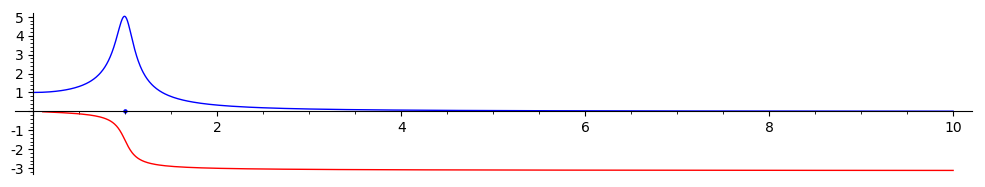

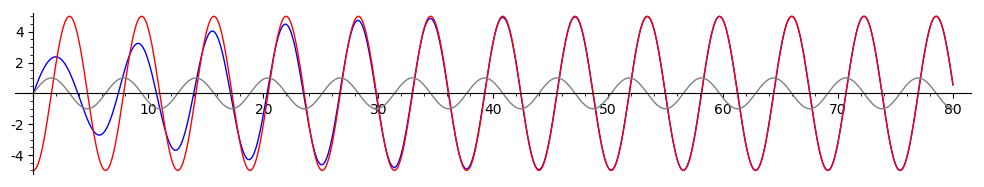

omega^4 + 15.6400000000000*omega^2 + 1


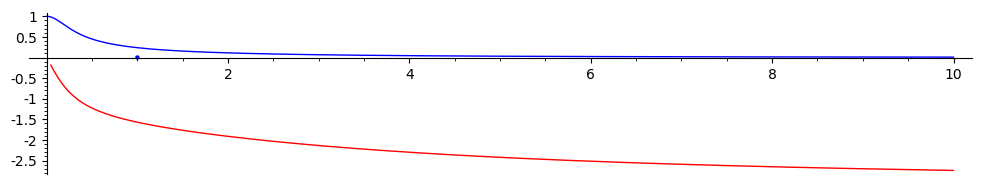

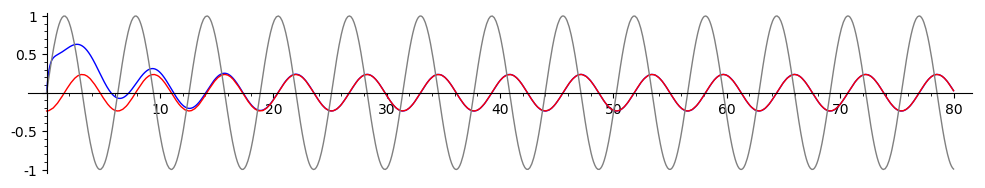

In [62]:
plot_A_traj(g_=0.2,omega_=1.)
plot_A_traj(g_=4.2,omega_=1.)

We can further analyze the formula for resonance and e.g. find its maximum in $omega$:

In [63]:
showmath(A.diff(omega))

<IPython.core.display.Math object>

In [64]:
sol = solve(A.diff(omega), omega)
showmath(sol)

<IPython.core.display.Math object>

In [65]:
omega_max = sol[1].rhs()
showmath(omega_max)

<IPython.core.display.Math object>

In [66]:
showmath( (omega_max^2).factor() )

<IPython.core.display.Math object>

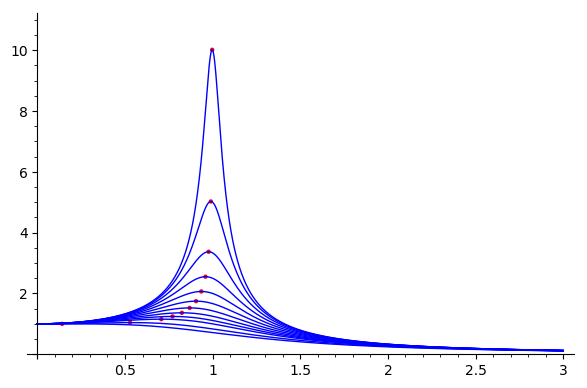

In [67]:
p=[]
for g_ in srange(0.1,1,0.1)+srange(1,1.41,.2):
    pars = {g:g_,a:1,omega0:1}
    omega_max_v =  omega_max.subs(pars).n()
    if omega_max_v.is_real():
        p.append( point( (omega_max_v,A.subs(pars).subs(omega==omega_max_v) ),color='red' ) ) 
    p.append(  plot(A.subs(pars),(omega,0,3)) ) 
sum(p).show(ymax=11)

In above formula we see that in the weak damping limit the resonance frequency tends to internal frequency of the oscillator. But with increased damping we position moves towards lower values of frequency. Also it can be easily seen that for 

$$ -\gamma^2+2 \omega_0^2 <0$$ 

because:

$$ -\gamma^2+2 \omega_0^2 = (\sqrt 2 \omega_0-\gamma)(\sqrt 2 \omega_0+\gamma)$$ 

for 

$$ \sqrt 2 \omega_0 < \gamma, $$

the resonance disappears - i.e. there is not maxima in $A(\omega)$ dependence. 

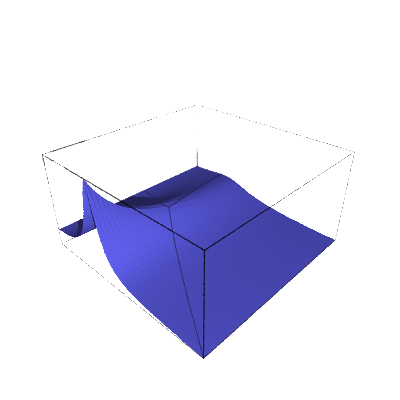

In [68]:
pars = {a:1,omega0:1}
plot3d( A.subs(pars), (omega,0,3),(g,0.2,1) ).show(viewer='tachyon',figsize=4)

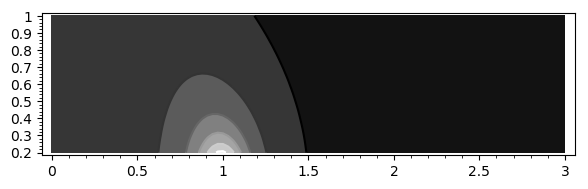

In [69]:
pars = {a:1,omega0:1}
contour_plot( A.subs(pars), (omega,0,3),(g,0.2,1) )

### Power absorbed


We can also analyze how much power is absorbes by periodically driven harmonic oscillator. We can use the solution $t\to\infty$ which has a form:

In [70]:
showmath( r_szczegolne )

<IPython.core.display.Math object>

Power dissipation  is force times the velocity, so:

In [71]:
P = g*(r_szczegolne.diff(t))^2

We want to integrate the power oven one period of oscillations

In [72]:
showmath( P.integrate(t,0,2*pi) )

<IPython.core.display.Math object>

We can plot this formula together with an expression for amplitude. 

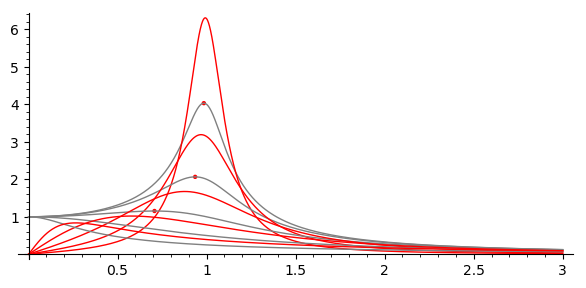

In [73]:
p=[]
for g_ in [0.25,0.5,1,2,4]:
    pars = {g:g_,a:1,omega0:1}
    assume(omega>0)
    omega_max_v =  omega_max.subs(pars).n()
    if omega_max_v.is_real():
        p.append( point( (omega_max_v,A.subs(pars).subs(omega==omega_max_v) ),color='red' ) ) 
    p.append(  plot(A.subs(pars),(omega,0,3), color='gray') ) 
    p.append(  plot(P.subs(pars).integrate(t,0,2*pi/omega)/2,(omega,0,3),color='red') ) 
sum(p).show(figsize=(6,3))

\newpage